# Prepare grids for gravity inversion

In [17]:
import pygmt
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [45]:
cd

C:\Users\matthewt


In [46]:
cd Documents\Python_Scripts\RIS_gravity_inversion\inversion_layers

C:\Users\matthewt\Documents\Python_Scripts\RIS_gravity_inversion\inversion_layers


In [39]:
figheight=90 # in mm
"""
# for Ross Embayment
ris_xl= -760_000
ris_yl= -2_200_000 #N extent
ris_xh= 600_000
ris_yh= -350_000 #S extent
"""
# for RIS only
ris_xl=-760_000
ris_xh=600_000
ris_yl=-1_600_000
ris_yh=-240_000

figwidth=figheight*(ris_xh-ris_xl)/(ris_yh-ris_yl)
risratio = (ris_yh - ris_yl) / (figheight/1000)
risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh) #W/E/S/N
risproj = "x1:" + str(risratio)
antreg = "-3330000/1900000/-3330000/1850000"
risproj_ll = "s0/-90/-71/1:" + str(risratio)

def make_fig():
    global fig, pos_str
    fig = pygmt.Figure()
    with pygmt.config(MAP_FRAME_TYPE = 'inside'):
        fig.coast(region = risreg, projection = risproj_ll, land = 'white', water = 'white', frame = ["nwse", "xf100000", "yf100000", "g0"],verbose='e')
    # set colorbar params
    barwidth = figwidth/10 * 0.4 # color bar width is 40% of the map width, in cm
    pos_str = 'jTL+w' + str(barwidth) + 'c+jTL+o1c/0.5c+h+ml+e'
    pygmt.config(FONT_ANNOT_PRIMARY = '4p,white', FONT_LABEL = '6p,white', 
                      MAP_ANNOT_MIN_SPACING = '0p', MAP_ANNOT_OFFSET_PRIMARY = '0.5p', MAP_TICK_PEN_PRIMARY = '0.4p,white', 
                      MAP_TICK_LENGTH_PRIMARY = '2p', MAP_FRAME_PEN = '0.3p,white', MAP_LABEL_OFFSET = '4p')


In [49]:
!gmt grdinfo ROSETTA_gravity_20k.nc

ROSETTA_gravity_20k.nc: Title: z
ROSETTA_gravity_20k.nc: Command: grdsample -R-760000/600000/-1600000/-240000 -I20e3 ROSETTA_gravity.nc -GROSETTA_gravity_20k.nc
ROSETTA_gravity_20k.nc: Remark: 
ROSETTA_gravity_20k.nc: Pixel node registration used [Cartesian grid]
ROSETTA_gravity_20k.nc: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
ROSETTA_gravity_20k.nc: x_min: -760000 x_max: 600000 x_inc: 20000 name: x n_columns: 68
ROSETTA_gravity_20k.nc: y_min: -1600000 y_max: -360000 y_inc: 20000 name: y n_rows: 62
ROSETTA_gravity_20k.nc: v_min: -318.849121094 v_max: 27.4373149872 name: z
ROSETTA_gravity_20k.nc: scale_factor: 1 add_offset: 0
ROSETTA_gravity_20k.nc: format: classic


In [51]:
!gmt grdsample -R-760000/600000/-1600000/-240000 -I20e3 ROSETTA_gravity.nc -GROSETTA_gravity_20k.nc
!gmt grdsample -R-760000/600000/-1600000/-240000 -I20e3 BedMachine_surface_5k_filled.nc -GBedMachine_surface_filled_20k.nc
!gmt grdsample -R-760000/600000/-1600000/-240000 -I20e3 BedMachine_icebase_5k_filled.nc -GBedMachine_icebase_filled_20k.nc
!gmt grdsample -R-760000/600000/-1600000/-240000 -I20e3 BedMachine_bed_5k.nc -GBedMachine_bed_20k.nc 
!gmt grdsample -R-760000/600000/-1600000/-240000 -I20e3 ROSETTA_basement_BedMachine_bed.nc -GROSETTA_basement_BedMachine_bed_20k.nc 

!gmt grd2xyz -R-760000/600000/-1600000/-240000 ROSETTA_gravity_20k.nc > ROSETTA_gravity.csv
!gmt grd2xyz -R-760000/600000/-1600000/-240000 BedMachine_surface_5k_filled_20k.nc > BedMachine_surface_5k_filled.csv
!gmt grd2xyz -R-760000/600000/-1600000/-240000 BedMachine_icebase_5k_filled_20k.nc > BedMachine_icebase_5k_filled.csv
!gmt grd2xyz -R-760000/600000/-1600000/-240000 BedMachine_bed_20k.nc > BedMachine_bed_5k.csv
!gmt grd2xyz -R-760000/600000/-1600000/-240000 ROSETTA_basement_BedMachine_bed_20k.nc > ROSETTA_basement_BedMachine_bed.csv

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


## SURFACE

#### Bedmap2 surface, NaN's set to 0

In [ ]:
!gmt grdmath -Df bedmap2_surface.tif gl04c_geoid_to_WGS84.tif ADD = bedmap2_surface_WGS_84.tif

In [23]:
!gmt grdsample bedmap2_surface_WGS_84.tif -Gbedmap2_surface_WGS_84_RIS_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [40]:
!gmt grdmath -Df bedmap2_surface_WGS_84_RIS_5k.nc 0 DENAN = layers/bedmap2_surface_WGS_84_RIS_5k_filled.nc

In [26]:
!gmt grd2xyz bedmap2_surface_WGS_84_RIS_5k.nc  > bedmap2_surface_WGS_84_RIS_5k.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


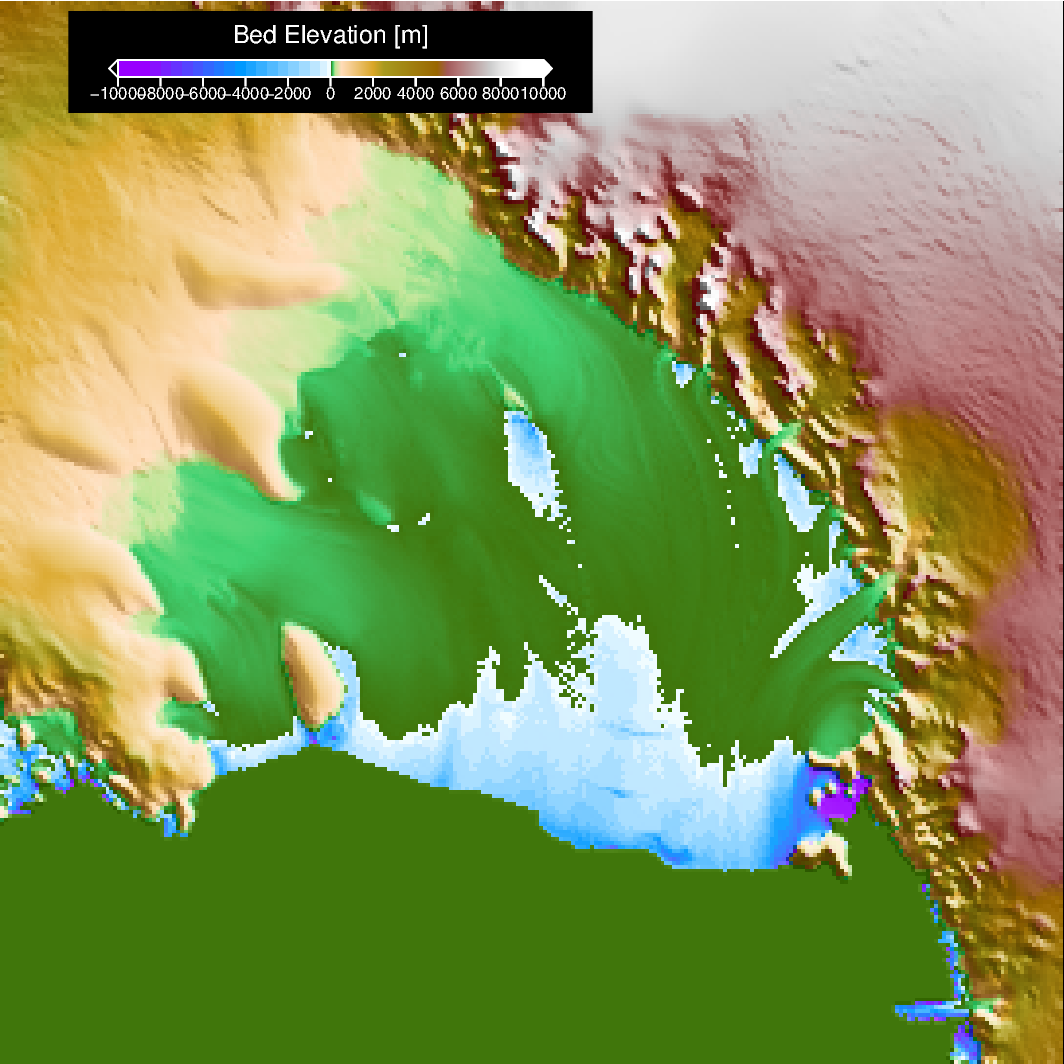

In [5]:
make_fig()
fig.grdimage(grid ='layers/bedmap2_surface_WGS_84_RIS_5k_filled.nc', cmap ='globe', shading='grdgradient+a45/45+nt1+m0', projection=risproj, region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa2000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## ICEBASE

#### Bedmap2 surface-thickness, NaN's set to 0

!gmt grdmath -Df bedmap2_surface.tif bedmap2_thickness.tif SUB = bedmap2_icebase.nc

!gmt grdsample bedmap2_icebase.nc -Gbedmap2_icebase_RIS.nc -R-760000/600000/-1600000/-240000

!gmt grdmath -Df bedmap2_icebase.nc gl04c_geiod_to_WGS84.tif ADD = bedmap2_icebase_WGS_84.tif

!gmt grdsample bedmap2_icebase_WGS_84.tif -Gbedmap2_icebase_WGS_84_RIS_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e

!gmt grdmath -Df bedmap2_icebase_WGS_84_RIS_5k.nc 0 DENAN = layers/bedmap2_icebase_WGS_84_RIS_5k_filled.nc

!gmt grd2xyz bedmap2_icebase_WGS_84_RIS_5k_filled.nc > bedmap2_icebase_WGS_84_RIS_5k_filled.csv

In [67]:
!gmt grdsample bedmap2_thickness.tif -Gbedmap2_thickness_RIS_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [70]:
!gmt grdmath -Df layers/bedmap2_surface_WGS_84_RIS_5k_filled.nc bedmap2_thickness_RIS_5k.nc SUB = bedmap2_icebase_WGS_84_RIS_5k.nc

In [71]:
!gmt grdmath -Df bedmap2_icebase_WGS_84_RIS_5k.nc 0 DENAN = layers/bedmap2_icebase_WGS_84_RIS_5k_filled.nc

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


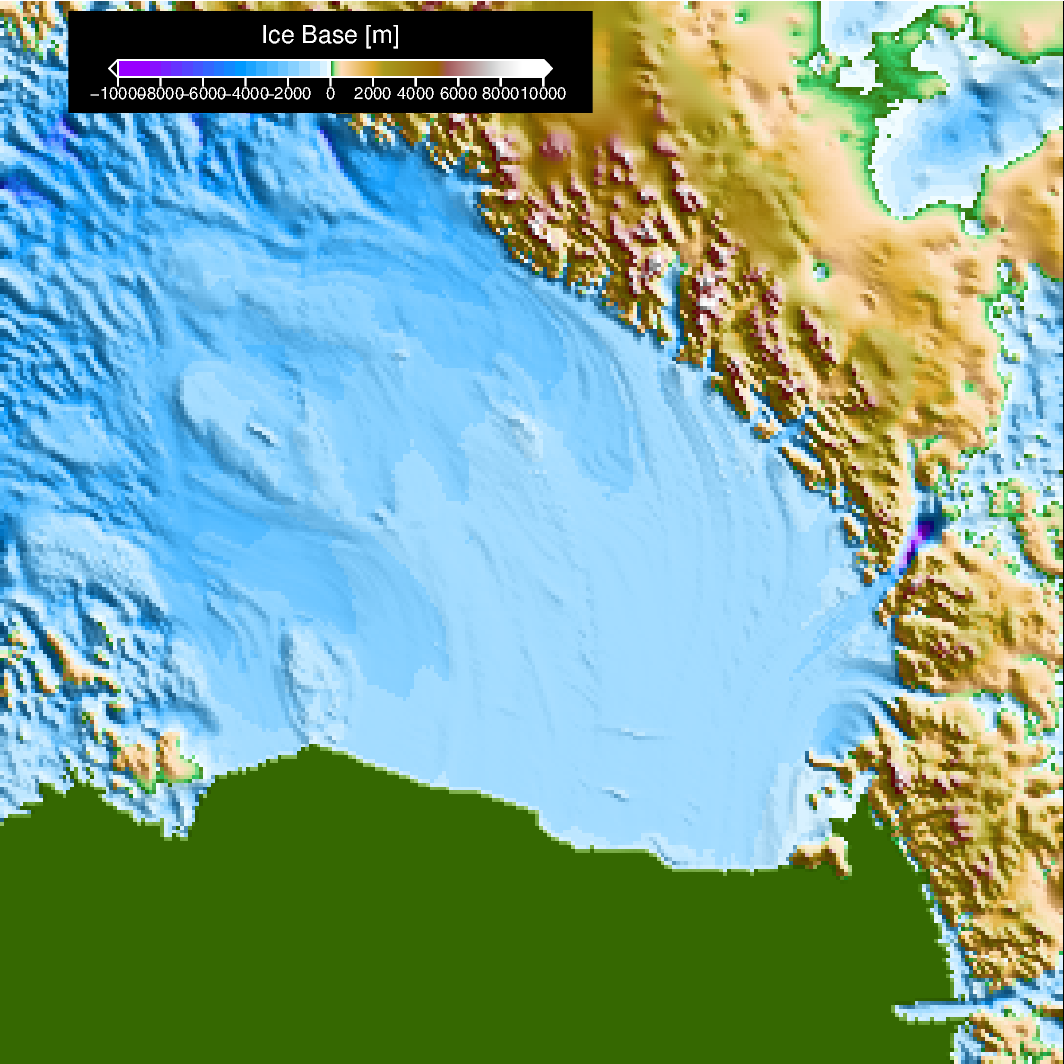

In [72]:
make_fig()
fig.grdimage(grid ='layers/bedmap2_icebase_WGS_84_RIS_5k_filled.nc', cmap ='globe', region=risreg, projection=risproj, shading='grdgradient+a45/45+nt1+m0', nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa2000+l"Ice Base [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## BED

#### Bedmap2 bed

In [23]:
!gmt grdmath -Df bedmap2_bed.tif gl04c_geiod_to_WGS84.tif ADD = bedmap2_bed_WGS_84.tif

In [44]:
!gmt grdsample bedmap2_bed_WGS_84.tif -Glayers/bedmap2_bed_WGS_84_RIS_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [32]:
!gmt grd2xyz layers/bedmap2_bed_WGS_84_RIS_5k.tif > bedmap2_bed_WGS_84_RIS_5k.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


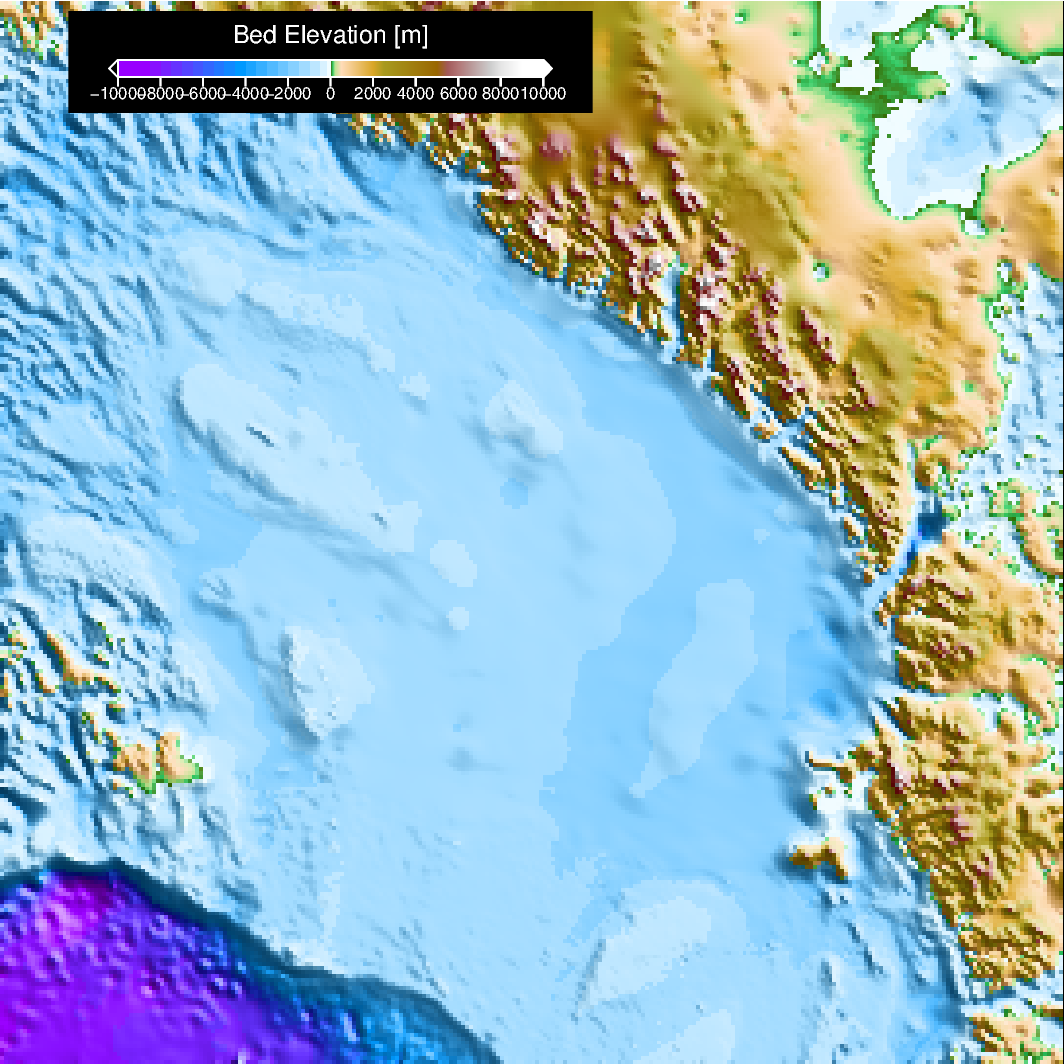

In [73]:
make_fig()
fig.grdimage(grid ='layers/bedmap2_bed_WGS_84_RIS_5k.nc', cmap ='globe', projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa2000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

#### Bedmap2 bed minus bedmachine bed

In [12]:
!gmt grdmath -Df layers/bedmap2_bed_WGS_84_RIS_5k.nc layers/BedMachine_bed_5k.nc SUB = layers/tmp_bedmap2_bedmachine_bed_diff.nc 

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


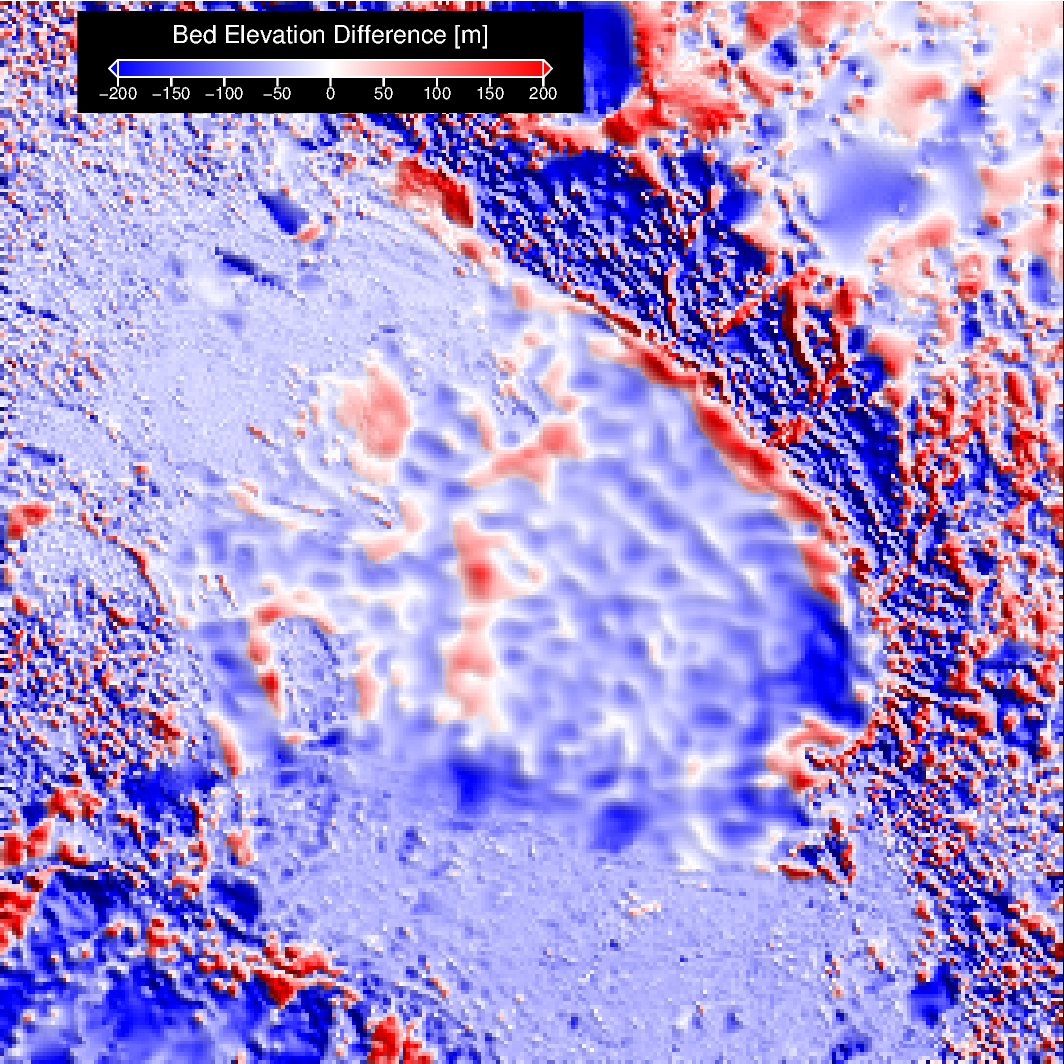

In [23]:
make_fig()
pygmt.makecpt(cmap='polar', series='-200/200', background='o')
fig.grdimage(grid ='layers/tmp_bedmap2_bedmachine_bed_diff.nc', cmap =True, projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap =True, position = pos_str,frame = 'xa50+l"Bed Elevation Difference [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## BASEMENT

#### ROSETTA_lindeque basement, merged to bedmap2 bed

In [49]:
!gmt grd2xyz rosetta_lindeque_basement_g80kfilt.nc -s > rosetta_lindeque_basement_g80kfilt.xyz

In [50]:
pygmt.surface(data = 'rosetta_lindeque_basement_g80kfilt.xyz', 
              spacing='5000+e', 
              region='-3330000/1900000/-3330000/1850000',
              M='20c',
              outfile='RE_basement_buffer.nc', verbose='e') 
!gmt grdsample RE_basement_buffer.nc -I5000+e -R-760000/600000/-1600000/-240000 -T -GRE_basement_buffer.nc
!gmt grdmath -Df RE_basement_buffer.nc ISNAN = RE_basement_buffer_mask.nc
!gmt grdmath -Df RE_basement_buffer_mask.nc layers/bedmap2_bed_WGS_84_RIS_5k.nc MUL = bedmap2_bed_WGS_84_RIS_5k_buffer.nc
!gmt grdmath bedmap2_bed_WGS_84_RIS_5k_buffer.nc 0 NAN = bedmap2_bed_WGS_84_RIS_5k_buffer_mask.nc
!gmt grdblend -Cf rosetta_lindeque_basement_g80kfilt.nc bedmap2_bed_WGS_84_RIS_5k_buffer_mask.nc -GRE_basement_bedmap2_bed.nc -rp -I5000+e -R-760000/600000/-1600000/-240000
# interpolated gap in QGIS with GRASS r.fillnulls -> RE_basement_bed_filled.tif

Elapsed time 00:50:02.541 | (surface) |


In [9]:
!gmt grd2xyz layers/ROSETTA_basement_bedmap2_bed.nc > layers/ROSETTA_basement_bedmap2_bed.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


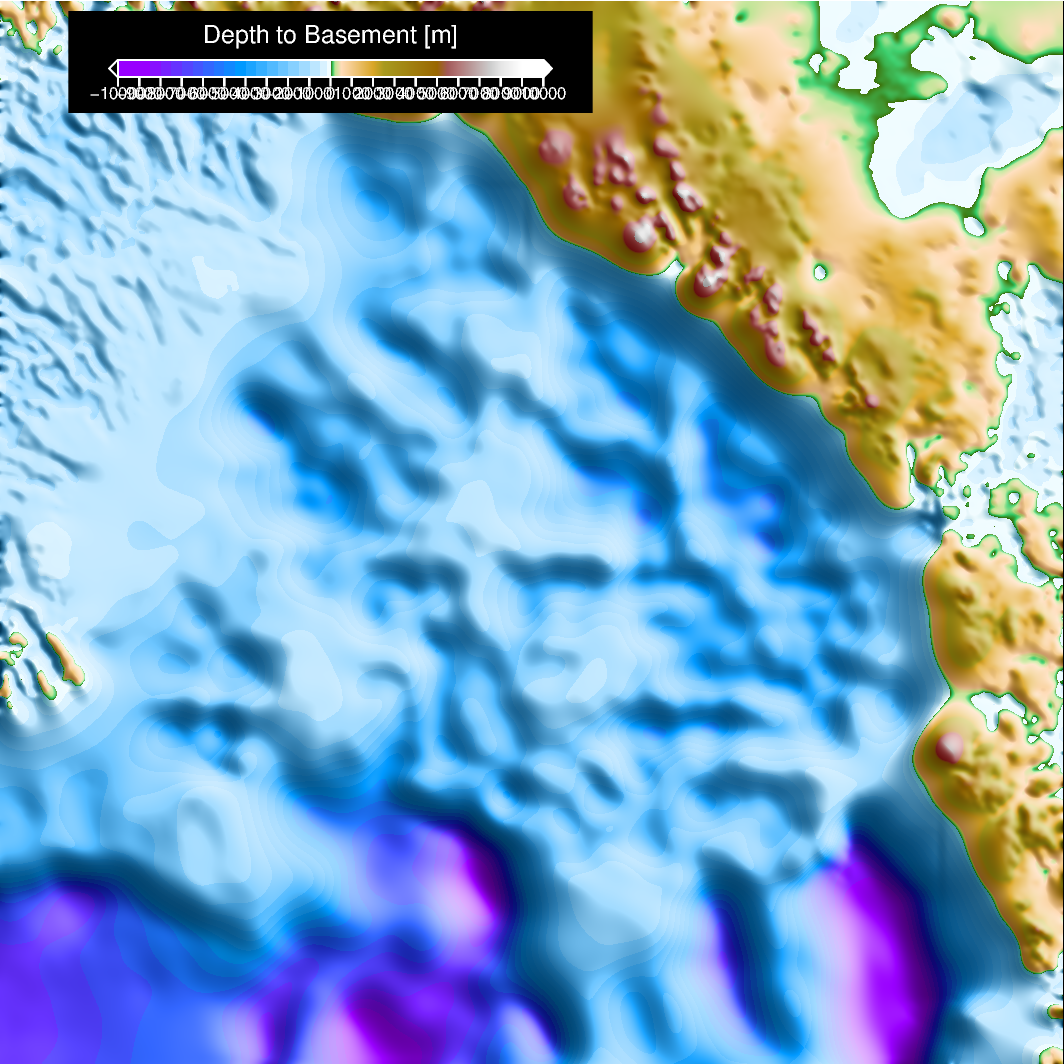

In [53]:
make_fig()

#pygmt.grdfilter(grid='rosetta_lindeque_basement.tif', filter='g100000', distance='0', outgrid='rosetta_lindeque_basement_filt.tif')

fig.grdimage(grid='layers/ROSETTA_basement_bedmap2_bed.nc', cmap='globe', projection=risproj, region=risreg, shading='grdgradient+a45/45+nt1+m0', nan_transparent=True, dpi='300')
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa1000+l"Depth to Basement [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## SURFACE

#### Bedmachine surface, NaN's set to 0

In [44]:
!gmt grdsample BedMachineAntarctica_2020-07-15_v02.nc?surface -R-760000/600000/-1600000/-240000 -r -GBedMachine_surface.nc -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [45]:
!gmt grdmath -Df BedMachine_surface.nc 0 DENAN = layers/BedMachine_surface_5k_filled.nc

In [10]:
!gmt grd2xyz layers/BedMachine_surface_5k_filled.nc > layers/BedMachine_surface_5k_filled.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


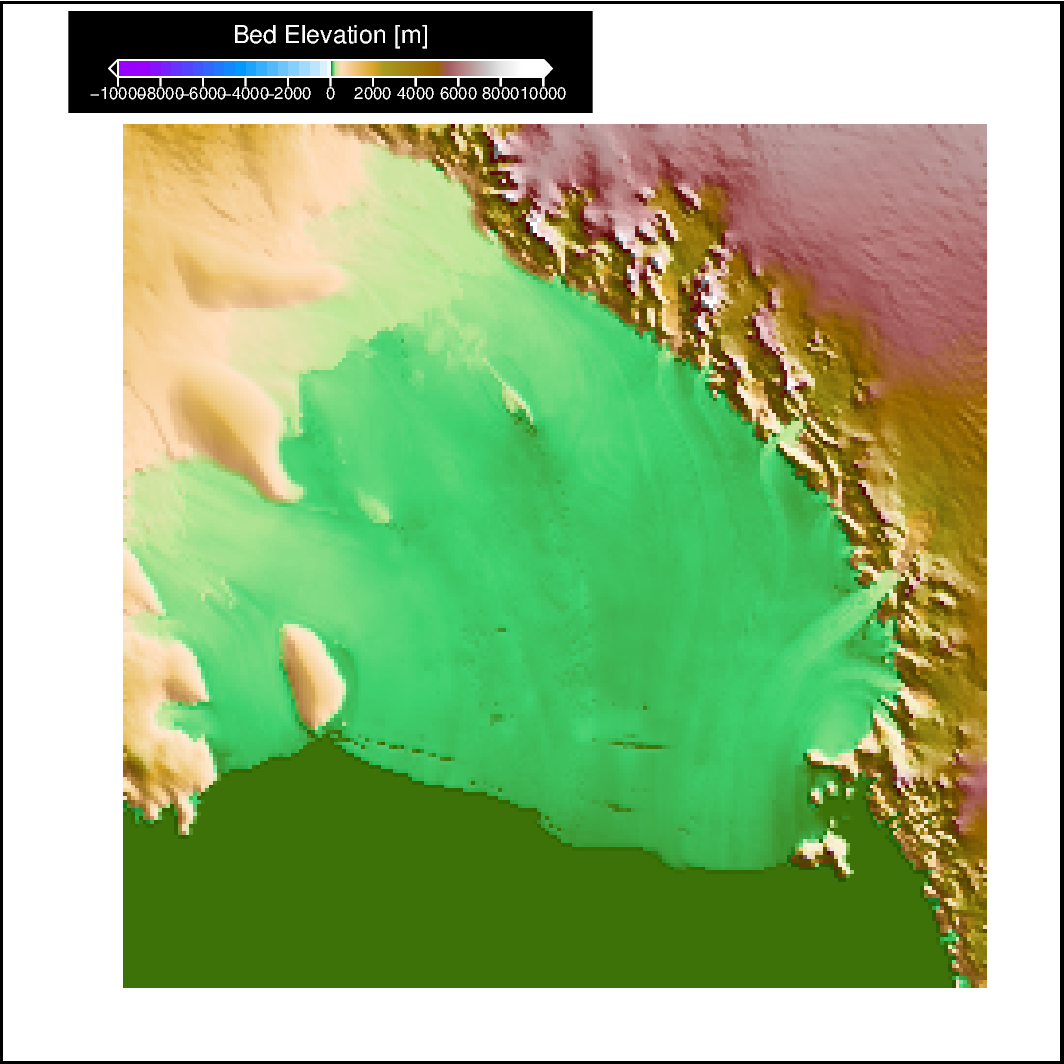

In [9]:
make_fig()
fig.grdimage(grid ='layers/BedMachine_surface_5k_filled.nc', cmap ='globe', shading='grdgradient+a45/45+nt1+m0', projection=risproj, region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa2000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## ICEBASE

#### BedMachine surface-thickness, NaN's set to 0

In [46]:
!gmt grdmath BedMachineAntarctica_2020-07-15_v02.nc?surface BedMachineAntarctica_2020-07-15_v02.nc?thickness SUB = BedMachine_icebase.nc

In [47]:
!gmt grdsample BedMachine_icebase.nc -GBedMachine_icebase_5k.nc -R-760000/600000/-1600000/-240000 -I5000+e -r

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [49]:
!gmt grdmath -Df BedMachine_icebase_5k.nc 0 DENAN = layers/BedMachine_icebase_5k_filled.nc

In [11]:
!gmt grd2xyz layers/BedMachine_icebase_5k_filled.nc > layers/BedMachine_icebase_5k_filled.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


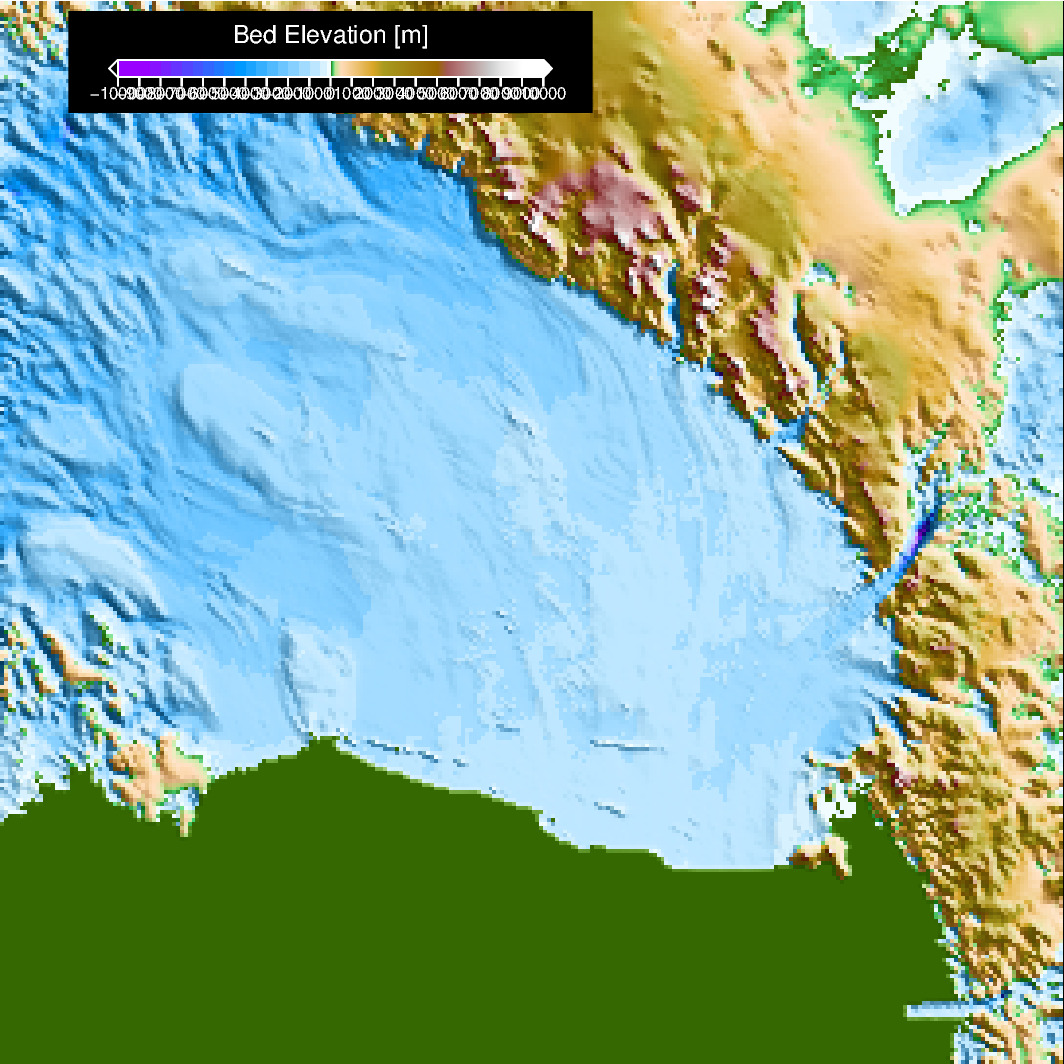

In [50]:
make_fig()
fig.grdimage(grid ='layers/BedMachine_icebase_5k_filled.nc', cmap ='globe', region=risreg, projection=risproj, shading='grdgradient+a45/45+nt1+m0', nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa1000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## BED

#### BedMachine bed

In [31]:
!gmt grdsample BedMachineAntarctica_2020-07-15_v02.nc?bed -Glayers/BedMachine_bed_5k.nc -R-760000/600000/-1600000/-240000 -r -I5000+e

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [12]:
!gmt grd2xyz layers/BedMachine_bed_5k.nc > layers/BedMachine_bed_5k.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


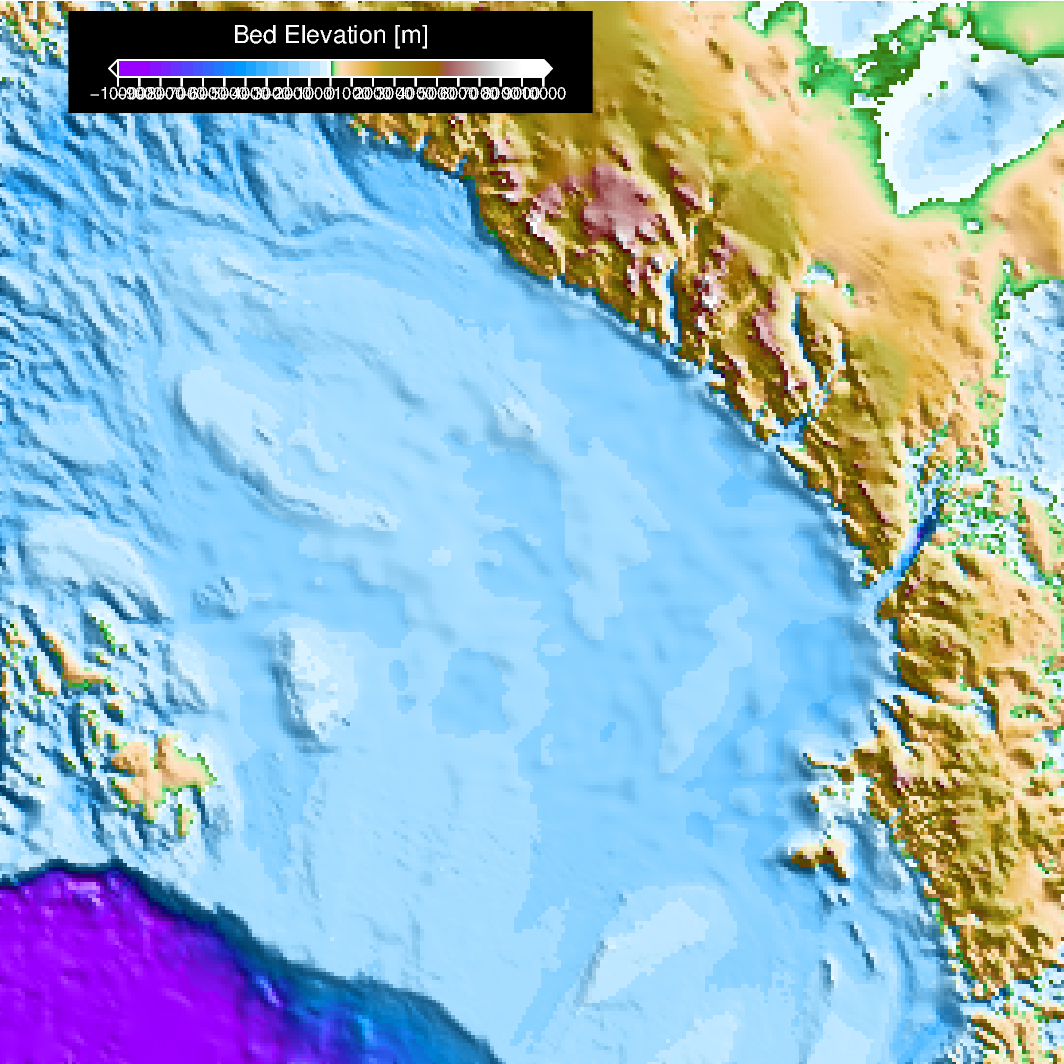

In [19]:
make_fig()
fig.grdimage(grid ='layers/BedMachine_bed_5k.nc', cmap ='globe', projection=risproj, shading='grdgradient+a45/45+nt1+m0', region=risreg, nan_transparent=True)
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa1000+l"Bed Elevation [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## BASEMENT

#### ROSETTA_lindeque basement, merged to BedMachine bed

In [49]:
!gmt grd2xyz rosetta_lindeque_basement_g80kfilt.nc -s > rosetta_lindeque_basement_g80kfilt.xyz

In [42]:
!gmt grdinfo layers/BedMachine_surface_5k_filled.nc

layers/BedMachine_surface_5k_filled.nc: Title: Produced by grdmath
layers/BedMachine_surface_5k_filled.nc: Command: grdmath -Df BedMachine_surface.nc 0 DENAN = layers/BedMachine_surface_5k_filled.nc
layers/BedMachine_surface_5k_filled.nc: Remark: 
layers/BedMachine_surface_5k_filled.nc: Pixel node registration used [Cartesian grid]
layers/BedMachine_surface_5k_filled.nc: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
layers/BedMachine_surface_5k_filled.nc: x_min: -600000 x_max: 500000 x_inc: 5000 name: x n_columns: 220
layers/BedMachine_surface_5k_filled.nc: y_min: -1500000 y_max: -400000 y_inc: 5000 name: y n_rows: 220
layers/BedMachine_surface_5k_filled.nc: v_min: 0 v_max: 4130.16748047 name: z
layers/BedMachine_surface_5k_filled.nc: scale_factor: 1 add_offset: 0
layers/BedMachine_surface_5k_filled.nc: format: netCDF-4 chunk_size: 220,220 shuffle: on deflation_level: 3


In [33]:
pygmt.surface(data = 'rosetta_lindeque_basement_g80kfilt.xyz', 
              spacing='5000+e', 
              region='-3330000/1900000/-3330000/1850000',
              M='20c',
              outfile='RE_basement_buffer.nc', verbose='e') 
!gmt grdsample RE_basement_buffer.nc -I5000+e -R-760000/600000/-1600000/-240000 -T -GRE_basement_buffer.nc
!gmt grdmath -Df RE_basement_buffer.nc ISNAN = RE_basement_buffer_mask.nc
!gmt grdmath -Df RE_basement_buffer_mask.nc layers/BedMachine_bed_5k.nc MUL = BedMachine_bed_5k_buffer.nc
!gmt grdmath BedMachine_bed_5k_buffer.nc 0 NAN = BedMachine_bed_5k_buffer_mask.nc
!gmt grdblend -Cf rosetta_lindeque_basement_g80kfilt.nc BedMachine_bed_5k_buffer_mask.nc -GRE_basement_BedMachinebed.nc -rp -I5000+e -R-760000/600000/-1600000/-240000
# interpolated gap in QGIS with GRASS r.fillnulls -> RE_basement_bed_filled.tif

Elapsed time 01:46:41.077 | (surface) |


In [13]:
!gmt grd2xyz layers/ROSETTA_basement_BedMachine_bed.nc > layers/ROSETTA_basement_BedMachine_bed.csv

psconvert [ERROR]: Registry registered C:\Program Files (x86)\GPLGS\gswin32c.exe does not exist. Resorting to the one provided in GMT.


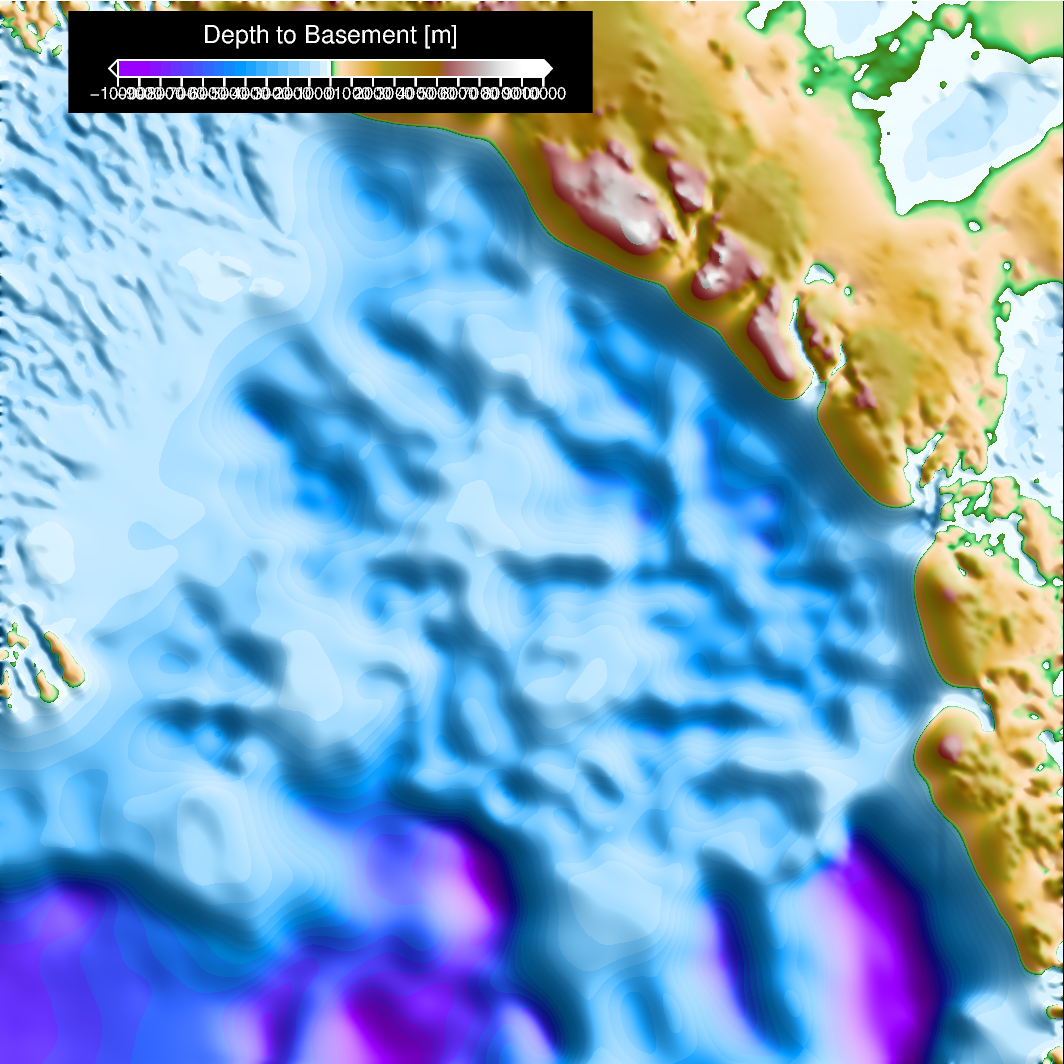

In [43]:
make_fig()

#pygmt.grdfilter(grid='rosetta_lindeque_basement.tif', filter='g100000', distance='0', outgrid='rosetta_lindeque_basement_filt.tif')

fig.grdimage(grid='layers/ROSETTA_basement_BedMachine_bed.nc', cmap='globe', projection=risproj, region=risreg, shading='grdgradient+a45/45+nt1+m0', nan_transparent=True, dpi='300')
fig.colorbar(cmap ='globe', position = pos_str,frame = 'xa1000+l"Depth to Basement [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()

## MOHO

#### NaN's interpolated to fill grid

### Lamb

In [47]:
!gmt grdsample Crust_Lamb.nc -GCrust_Lamb_RIS.nc -R-760000/600000/-1600000/-240000 -T

In [16]:
!gmt grdsample Crust_Lamb.nc -GCrust_Lamb_RE.nc -T

In [35]:
!gmt grdmath -Df -R-760000/600000/-1600000/-240000 bedmap2_bed_WGS_84_RIS_5k.tif Crust_Lamb_RIS.nc  SUB = Lamb_Moho_wgs84_RIS.tif 

In [18]:
!gmt grdmath -Df bedmap2_bed_WGS_84_5k.tif Crust_Lamb_RE.nc  SUB = Lamb_Moho_wgs84.tif 

In [36]:
!gmt grd2xyz Lamb_Moho_wgs84_RIS.tif  >Lamb_Moho_wgs84_RIS.csv

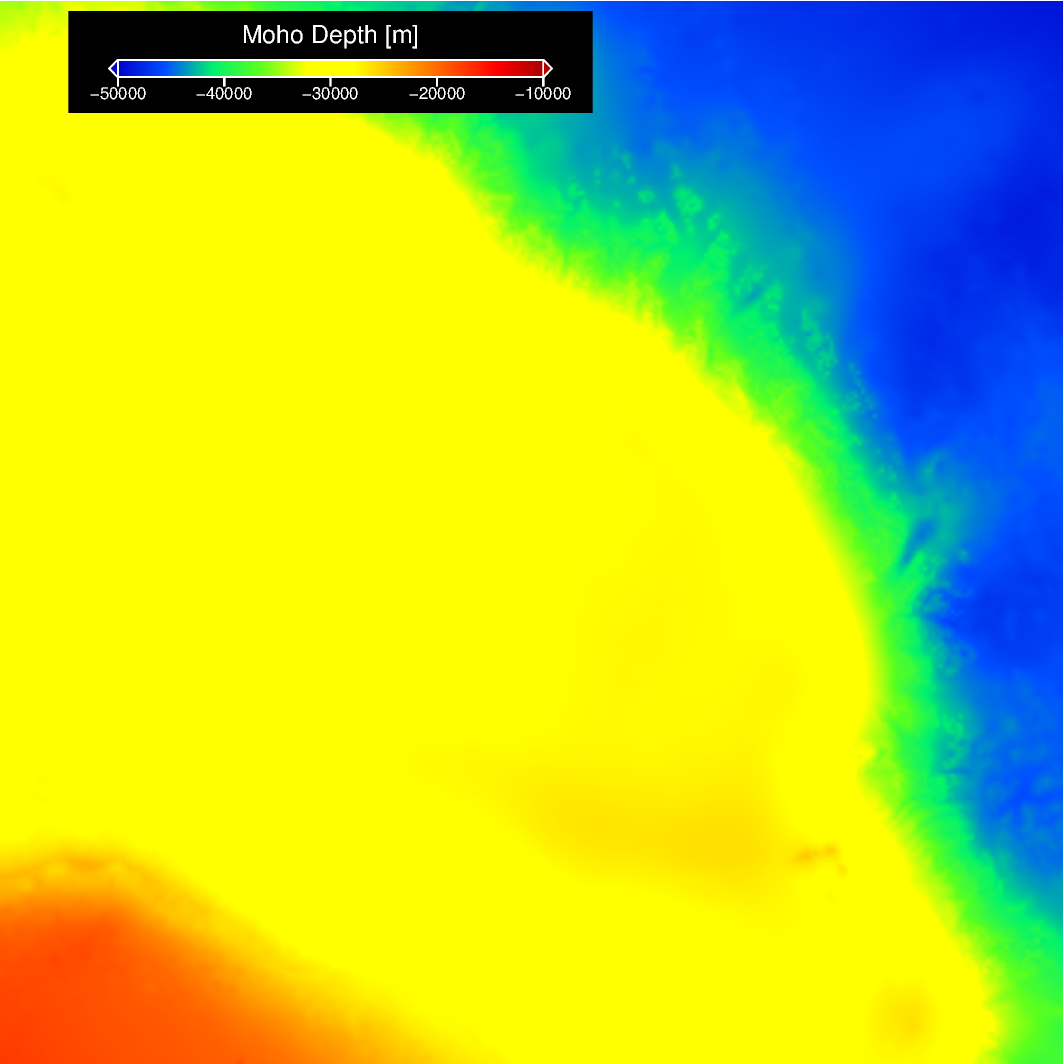

In [19]:
make_fig()

fig.grdimage(grid='Lamb_Moho_wgs84.tif', cmap="Moho.cpt", nan_transparent=True, dpi='500')
fig.colorbar(cmap="Moho.cpt", position = pos_str, frame = 'xa10000+l"Moho Depth [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()



## GRAVITY

In [17]:
ris_xl= -760_000
ris_yl= -1600_000 #N extent
ris_xh= 600_000
ris_yh= -350_000 #S extent
risreg = str(ris_xl) + '/' + str(ris_xh) + '/' + str(ris_yl) + '/' + str(ris_yh) #W/E/S/N
aerograv_data = "D:/ROSETTA_Data/from_LDEO_2021/rs_2019_grav.csv"
gravity = pd.read_csv(aerograv_data)
gravity = pygmt.blockmedian(table=gravity[["x", "y", "FAG_levelled"]], 
                                         spacing="5000+e", 
                                         region=risreg)
pygmt.surface(x=gravity.x, y=gravity.y, z=gravity.FAG_levelled,
              spacing='5000+e',
              outfile="layers/ROSETTA_gravity.nc",
              region=risreg,) 
!gmt grdmask ..\shapefiles\RIS_outline.shp -GRIS_mask.nc -I5000+e -R-760000/600000/-1600000/-350000 -NNaN/1/1
!gmt grdmath -Df layers/ROSETTA_gravity.nc RIS_mask.nc MUL = layers/ROSETTA_gravity.nc
!gmt grdsample layers/ROSETTA_gravity.nc -Glayers/ROSETTA_gravity.nc -T

In [18]:
!gmt grd2xyz layers/ROSETTA_gravity.nc > layers/ROSETTA_gravity.csv

In [153]:
print(pygmt.grdinfo("GRAV_50k.nc"))

GRAV_50k.nc: Title: z
GRAV_50k.nc: Command: grdsample GRAV_10k.nc -GGRAV_50k.nc -R-760000/600000/-1600000/-240000 -I50000+e -T
GRAV_50k.nc: Remark: 
GRAV_50k.nc: Pixel node registration used [Cartesian grid]
GRAV_50k.nc: Grid file format: nf = GMT netCDF format (32-bit float), CF-1.7
GRAV_50k.nc: x_min: -760000 x_max: 590000 x_inc: 50000 name: x n_columns: 27
GRAV_50k.nc: y_min: -1600000 y_max: -250000 y_inc: 50000 name: y n_rows: 27
GRAV_50k.nc: z_min: -171.858886719 z_max: 161.6015625 name: z
GRAV_50k.nc: scale_factor: 1 add_offset: 0
GRAV_50k.nc: format: classic



In [148]:
!gmt xyz2grd antgg_FAG_10k_RIS_hole_filled.xyz -GGRAV_10k.nc -I10000+e -R-760000/600000/-1600000/-240000

In [152]:
!gmt grdsample GRAV_10k.nc -GGRAV_50k.nc -R-760000/600000/-1600000/-240000 -I50000+e -T

grdsample [WARNING]: Output sampling interval in x exceeds input interval and may lead to aliasing.
grdsample [WARNING]: Output sampling interval in y exceeds input interval and may lead to aliasing.


In [165]:
!gmt grd2xyz GRAV_50k.nc > GRAV_50k_fromgrid.csv

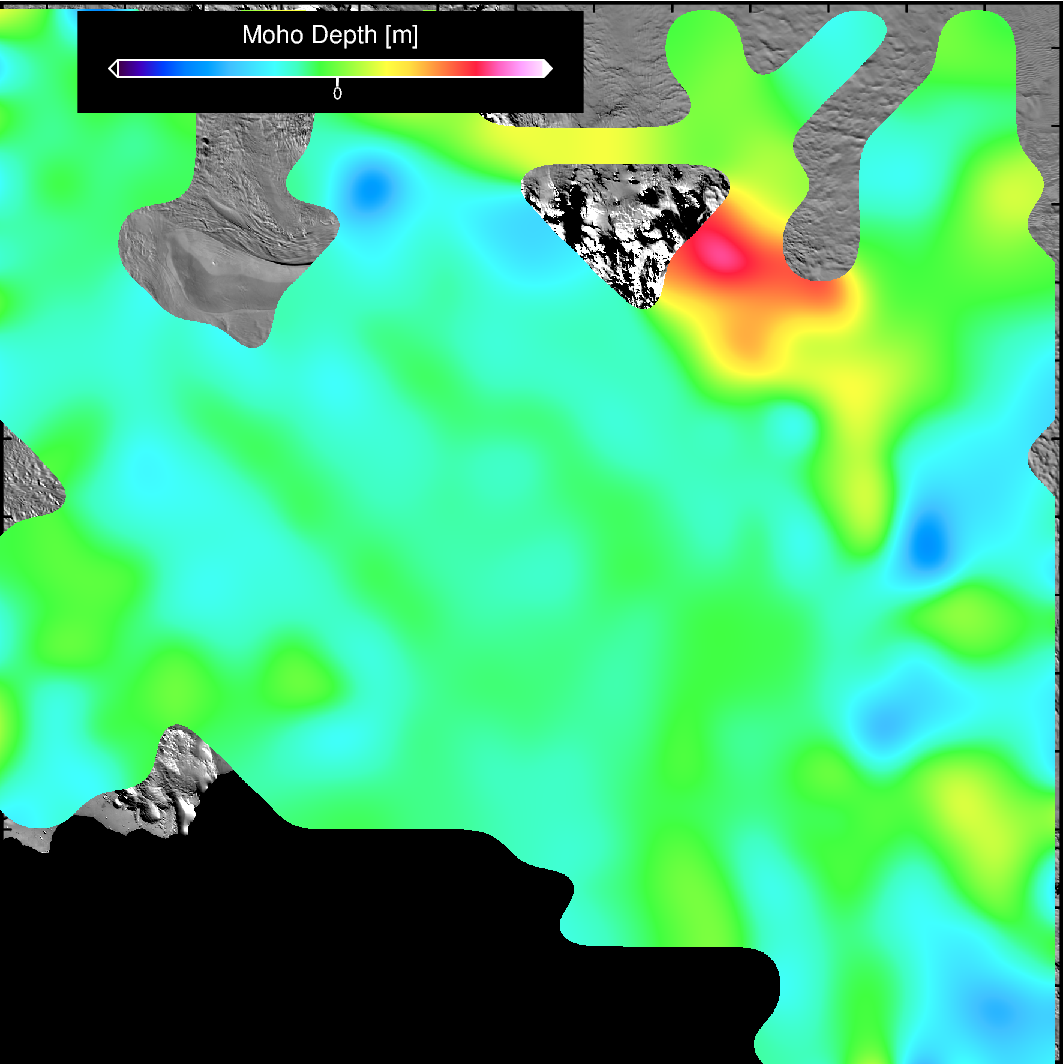

In [157]:
make_fig()

fig.grdimage(grid='GRAV_50k.nc', cmap="wysiwyg", nan_transparent=True, dpi='500')
fig.colorbar(cmap=True, position = pos_str, frame = 'xa10000+l"Moho Depth [m]"', box = '+gblack+p0.5p,black+c3p')
fig.show()


# Setup CSV's in format for inversion

In [86]:
def edit_csvs(file_in, file_out, rho):
    df = pd.read_csv(file_in, header=None, index_col=None, sep='\t', names=('X','Y','Z'))
    df['RHO']=rho
    df['CP']=0
    df.to_csv(file_out, sep=',', index=False)

In [90]:
edit_csvs('SURFACE_1k.csv', 'ICE_1k.csv', 0.92)

In [91]:
edit_csvs('ICEBASE_1k.csv', 'WATER_1k.csv', 1.03)

In [92]:
edit_csvs('BED_5k.csv', 'SEDIMENT_5k.csv', 2.3)

In [93]:
edit_csvs('BASEMENT_5k.csv', 'CRUST_5k.csv', 2.8)

In [94]:
edit_csvs('MOHO_5k.csv', 'MANTLE_5k.csv', 3.3)

In [168]:
df = pd.read_csv('GRAV_50k_fromgrid.csv', header=None, index_col=None, sep='\t', names=('X','Y','FA'))
df['Z']=800
df['FACP']=df.FA
df.dropna(inplace=True)
df.to_csv('GRAV_50k.csv', sep=',', index=False)
df

X        Y         FA    Z       FACP
0   -735000  -275000   0.801172  800   0.801172
1   -685000  -275000 -24.302734  800 -24.302734
2   -635000  -275000 -64.930466  800 -64.930466
3   -585000  -275000  33.173439  800  33.173439
5   -485000  -275000   0.656205  800   0.656205
..      ...      ...        ...  ...        ...
724  365000 -1575000  -1.894532  800  -1.894532
725  415000 -1575000 -65.063675  800 -65.063675
726  465000 -1575000 -55.844139  800 -55.844139
727  515000 -1575000 -77.757812  800 -77.757812
728  565000 -1575000 -66.422653  800 -66.422653

[531 rows x 5 columns]